In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.load as load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import pos_tag, word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
tweets_raw, test_data_raw = load.load_data(full = False, preprocessed = False)
tweets_raw.head()

,body,label
0,<user> i dunno justin read my mention or not ....,1
1,"because your logic is so dumb , i won't even c...",1
2,""" <user> just put casper in a box ! "" looved t...",1
3,<user> <user> thanks sir > > don't trip lil ma...,1
4,visiting my brother tmr is the bestest birthda...,1


In [3]:
tweets = tweets_raw.copy()
# we'll check the length of each tweet and counts of words used before and after preprocessing
# as we know, max of words is 280
tweets_raw['words_count'] = tweets_raw['body'].apply(lambda x: len(str(x).split()))
tweets_raw['tweet_len'] = tweets_raw['body'].astype(str).apply(len)
tweets_raw.head()

,body,label,words_count,tweet_len
0,<user> i dunno justin read my mention or not ....,1,27,127
1,"because your logic is so dumb , i won't even c...",1,21,91
2,""" <user> just put casper in a box ! "" looved t...",1,15,69
3,<user> <user> thanks sir > > don't trip lil ma...,1,17,78
4,visiting my brother tmr is the bestest birthda...,1,13,66


In [4]:
# before preprocessing
print(tweets_raw['tweet_len'].mean())
print(tweets_raw['words_count'].mean())

75.89486
15.73753


In [7]:
tweets, test_data = load.load_data(full = False, preprocessed = True)
tweets.head()

,body,label
0,not know justin read mention not only justin g...,1
1,logic dumb not even crop name photo tsk,1
2,put casper box ! looved battle ! <hashtag> cra...,1
3,thanks sir not trip lil mama .. keep doin ya t...,1
4,visit brother tmr bestest birthday gift eveerr...,1


In [8]:
# after preprocessing
tweets['words_count'] = tweets['body'].apply(lambda x: len(str(x).split()))
tweets['tweet_len'] = tweets['body'].astype(str).apply(len)
tweets.head()

,body,label,words_count,tweet_len
0,not know justin read mention not only justin g...,1,15,92
1,logic dumb not even crop name photo tsk,1,8,39
2,put casper box ! looved battle ! <hashtag> cra...,1,9,53
3,thanks sir not trip lil mama .. keep doin ya t...,1,12,52
4,visit brother tmr bestest birthday gift eveerr...,1,10,62


In [9]:
# how many words were used in average? as we know, max is 280
print(tweets['tweet_len'].mean())
print(tweets['words_count'].mean())

50.57365
8.510485


In [25]:
prepped = tweets.copy()
raw = tweets_raw.copy()
prepped['type'] = 'preprocessed'
raw['type'] = 'raw'
df = pd.concat([prepped, raw], axis=0)

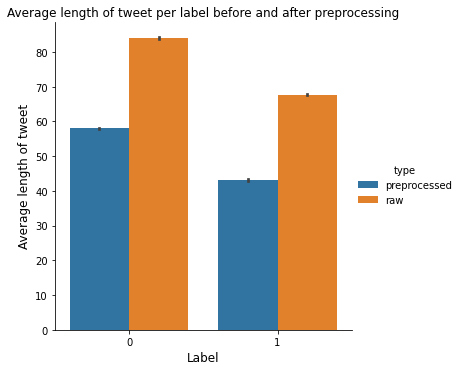

In [26]:
sns.factorplot(x='label', y='tweet_len', hue='type', kind='bar', data=df)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Average length of tweet', fontsize=12)
plt.xticks(fontsize=10, rotation= 360)
plt.yticks(fontsize=10)
plt.title('Average length of tweet per label before and after preprocessing', fontsize=12)
plt.show()

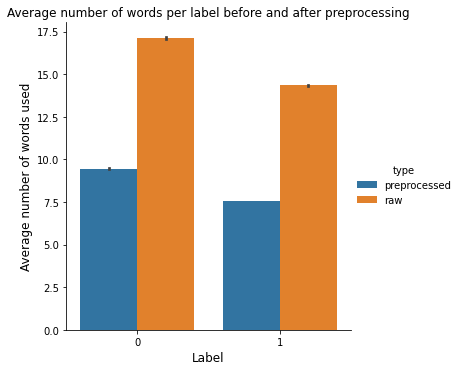

In [28]:
sns.factorplot(x='label', y='words_count', hue='type', kind='bar', data=df)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Average number of words used', fontsize=12)
plt.xticks(fontsize=10, rotation= 360)
plt.yticks(fontsize=10)
plt.title('Average number of words per label before and after preprocessing', fontsize=12)
plt.show()

In [31]:
tweets_raw['tweet_str'] = [''.join(map(str,l)) for l in tweets_raw['body']]
tweets_raw.head()

,body,label,words_count,tweet_len,tweet_str
0,<user> i dunno justin read my mention or not ....,1,27,127,<user> i dunno justin read my mention or not ....
1,"because your logic is so dumb , i won't even c...",1,21,91,"because your logic is so dumb , i won't even c..."
2,""" <user> just put casper in a box ! "" looved t...",1,15,69,""" <user> just put casper in a box ! "" looved t..."
3,<user> <user> thanks sir > > don't trip lil ma...,1,17,78,<user> <user> thanks sir > > don't trip lil ma...
4,visiting my brother tmr is the bestest birthda...,1,13,66,visiting my brother tmr is the bestest birthda...


In [32]:
example = tweets_raw['tweet_str']
tokenized_sents = [word_tokenize(i) for i in example]
allwords = []
for wordlist in tokenized_sents:
    allwords += wordlist

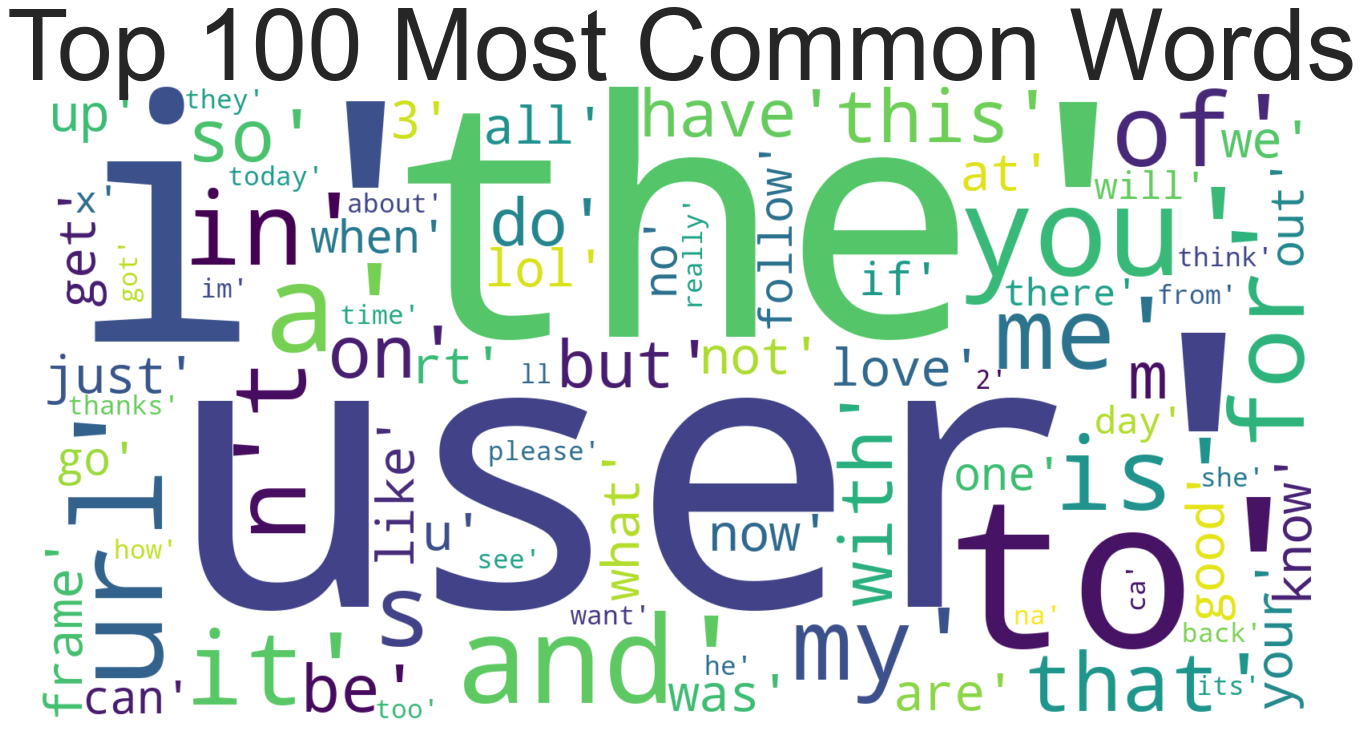

In [33]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

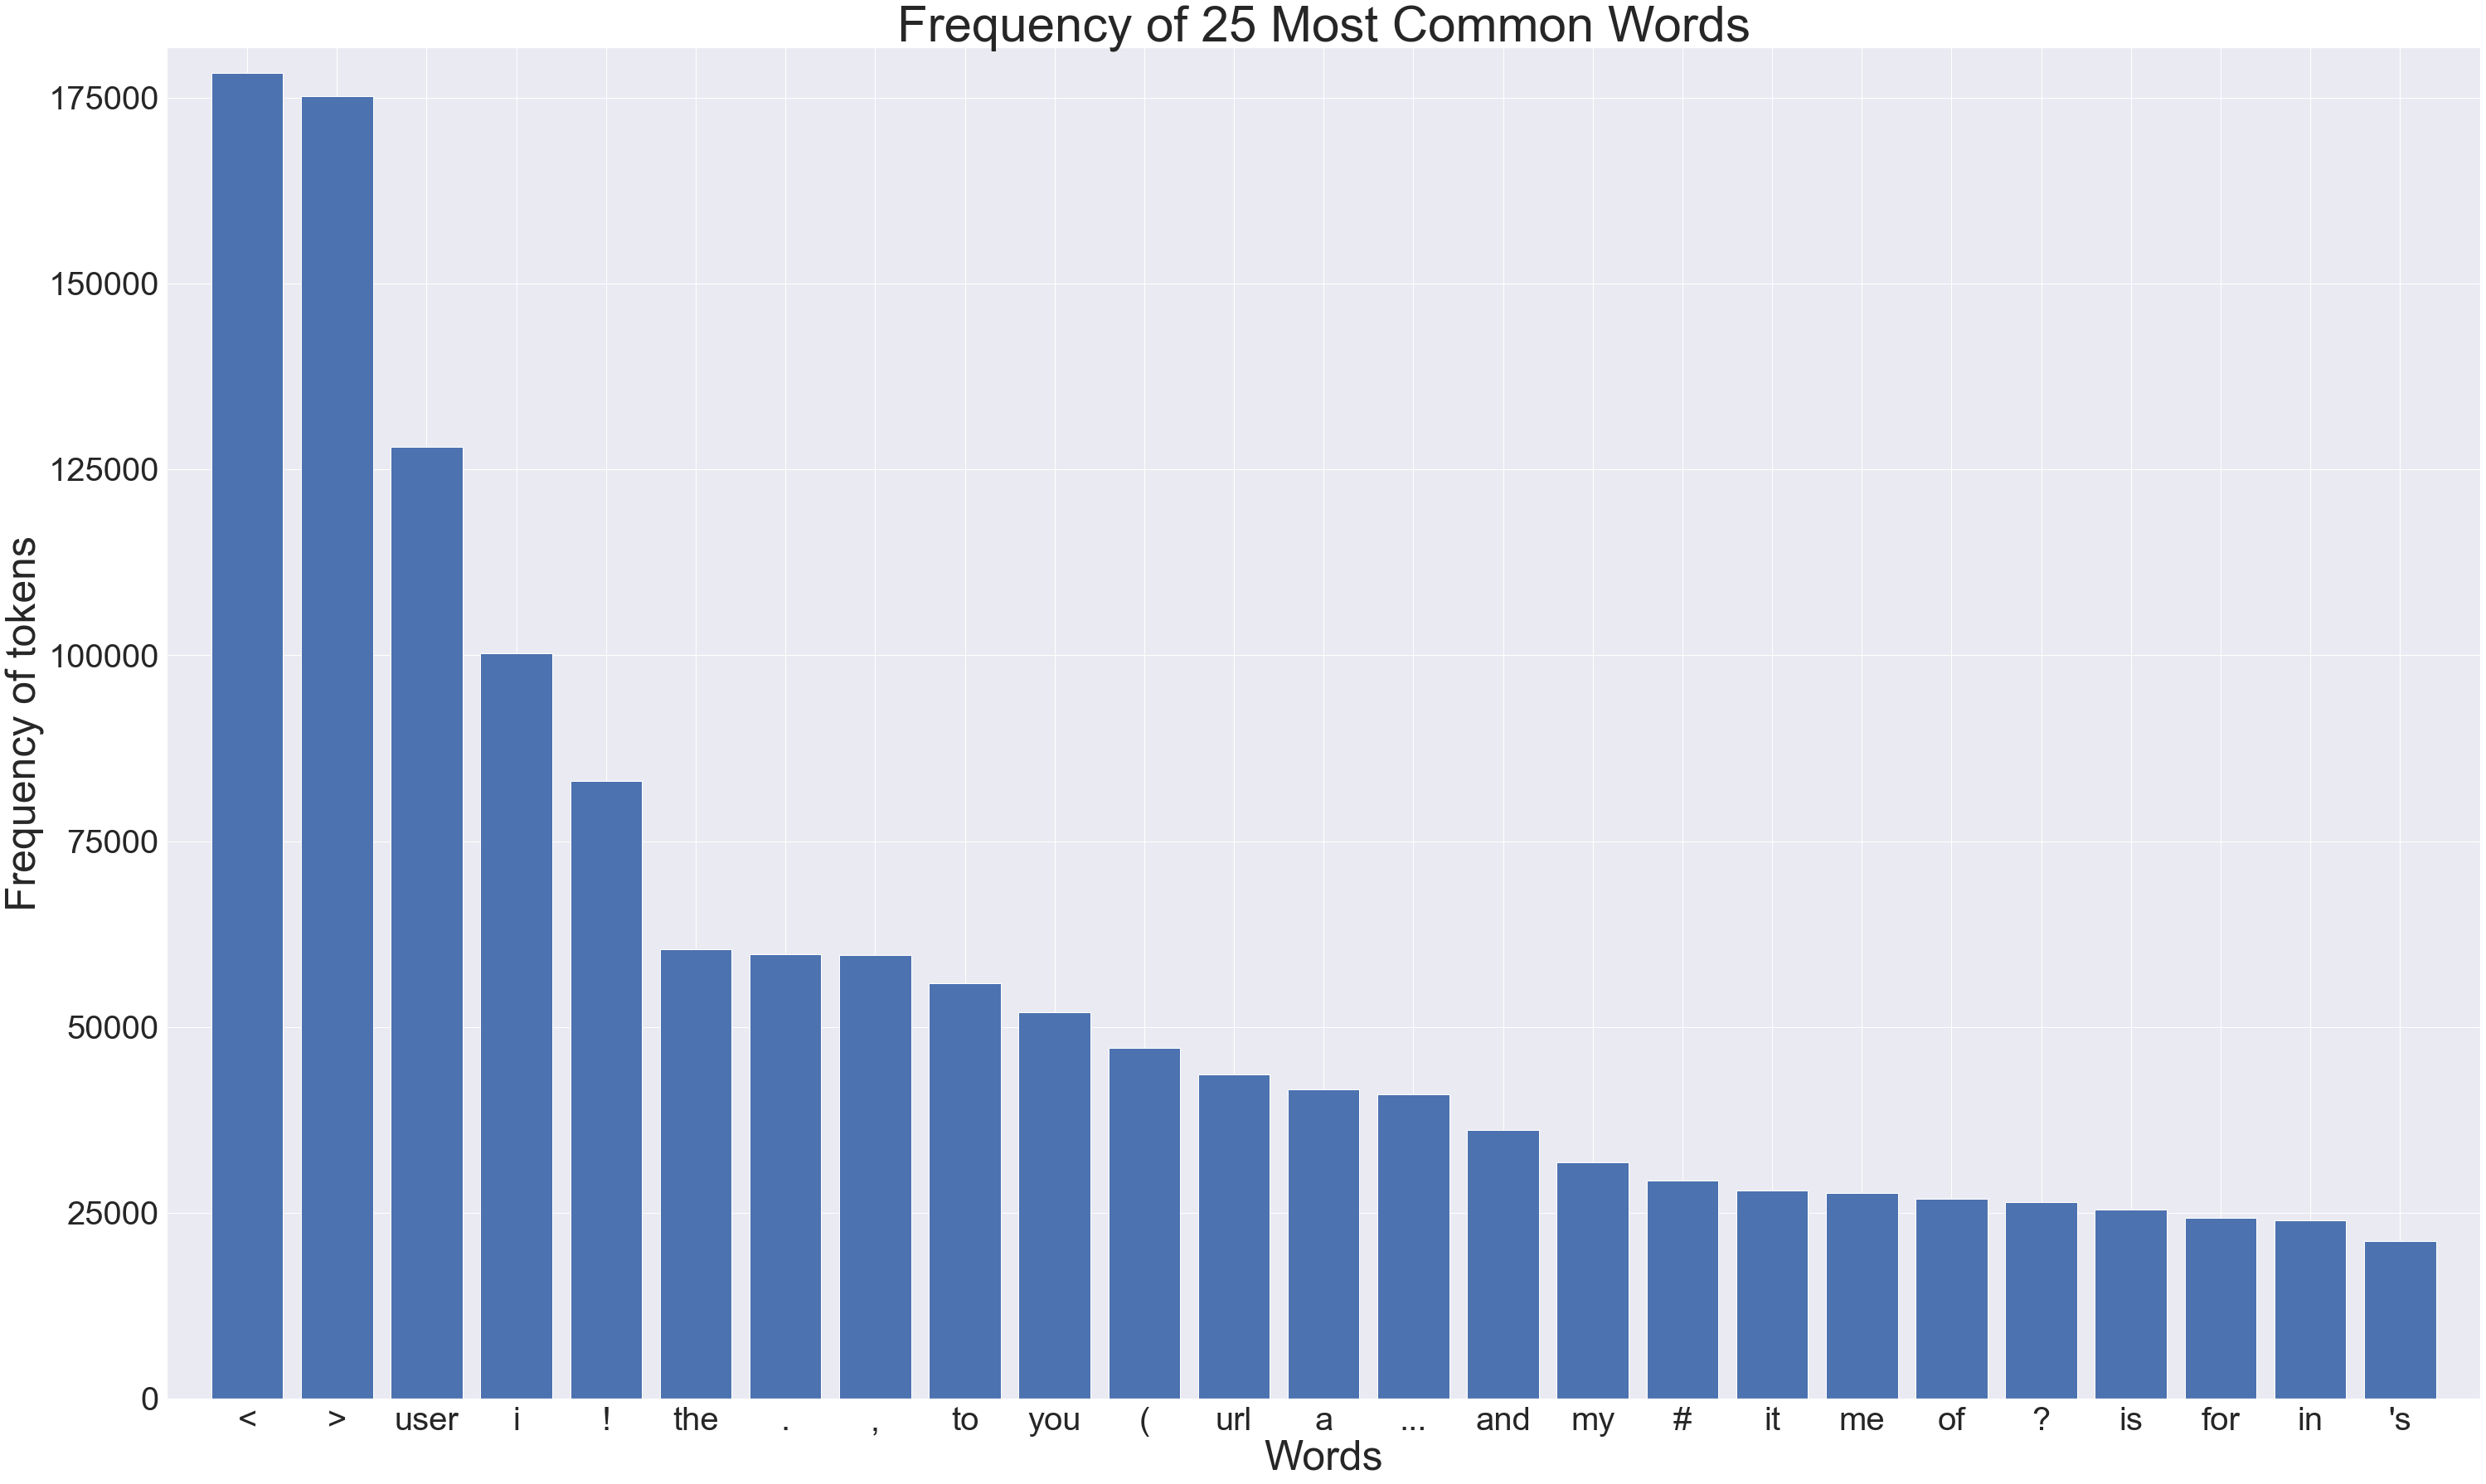

In [34]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of tokens', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=360, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [35]:
tweets['tweet_str'] = [''.join(map(str,l)) for l in tweets['body']]
tweets.head()

,body,label,words_count,tweet_len,tweet_str
0,not know justin read mention not only justin g...,1,15,92,not know justin read mention not only justin g...
1,logic dumb not even crop name photo tsk,1,8,39,logic dumb not even crop name photo tsk
2,put casper box ! looved battle ! <hashtag> cra...,1,9,53,put casper box ! looved battle ! <hashtag> cra...
3,thanks sir not trip lil mama .. keep doin ya t...,1,12,52,thanks sir not trip lil mama .. keep doin ya t...
4,visit brother tmr bestest birthday gift eveerr...,1,10,62,visit brother tmr bestest birthday gift eveerr...


In [36]:
example2 = tweets['tweet_str']
tokenized_sents2 = [word_tokenize(i) for i in example2]
allwords2 = []
for wordlist2 in tokenized_sents2:
    allwords2 += wordlist2

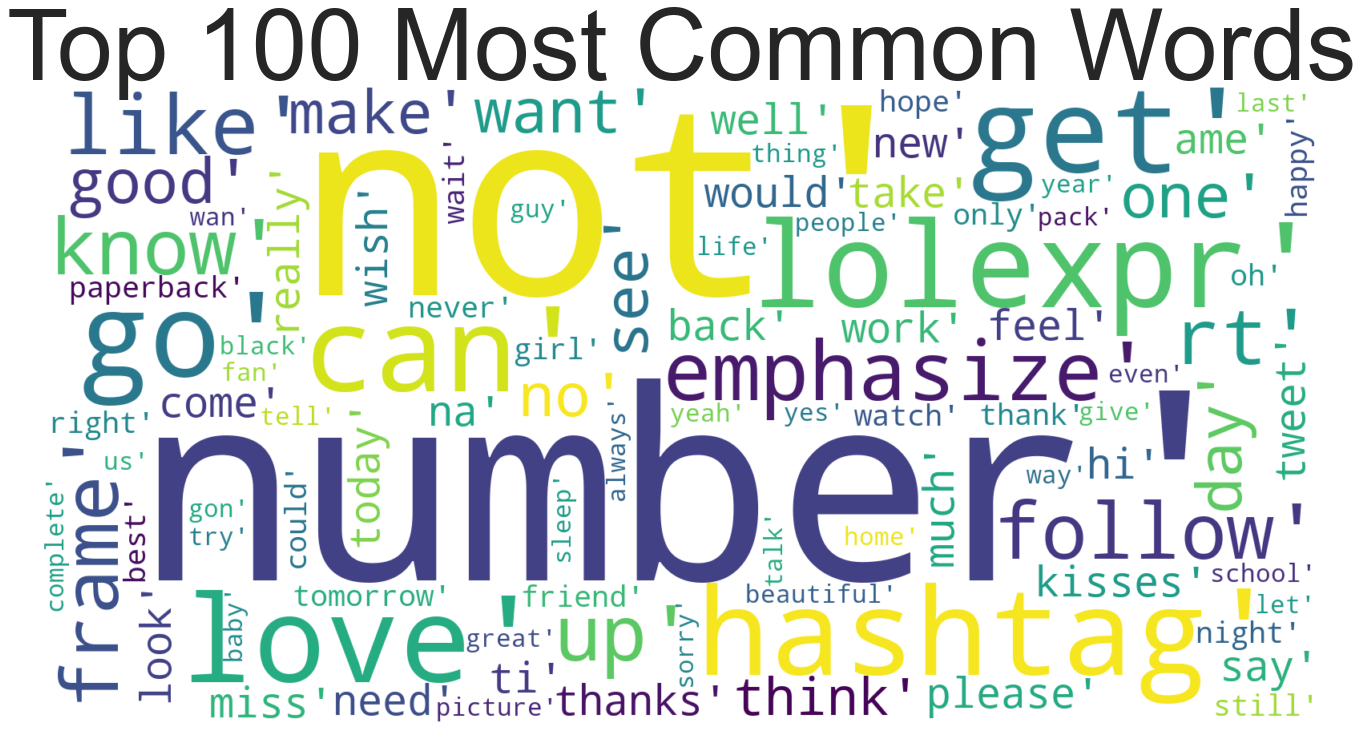

In [37]:
mostcommon2 = FreqDist(allwords2).most_common(100)
wordcloud2 = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon2))
fig2 = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

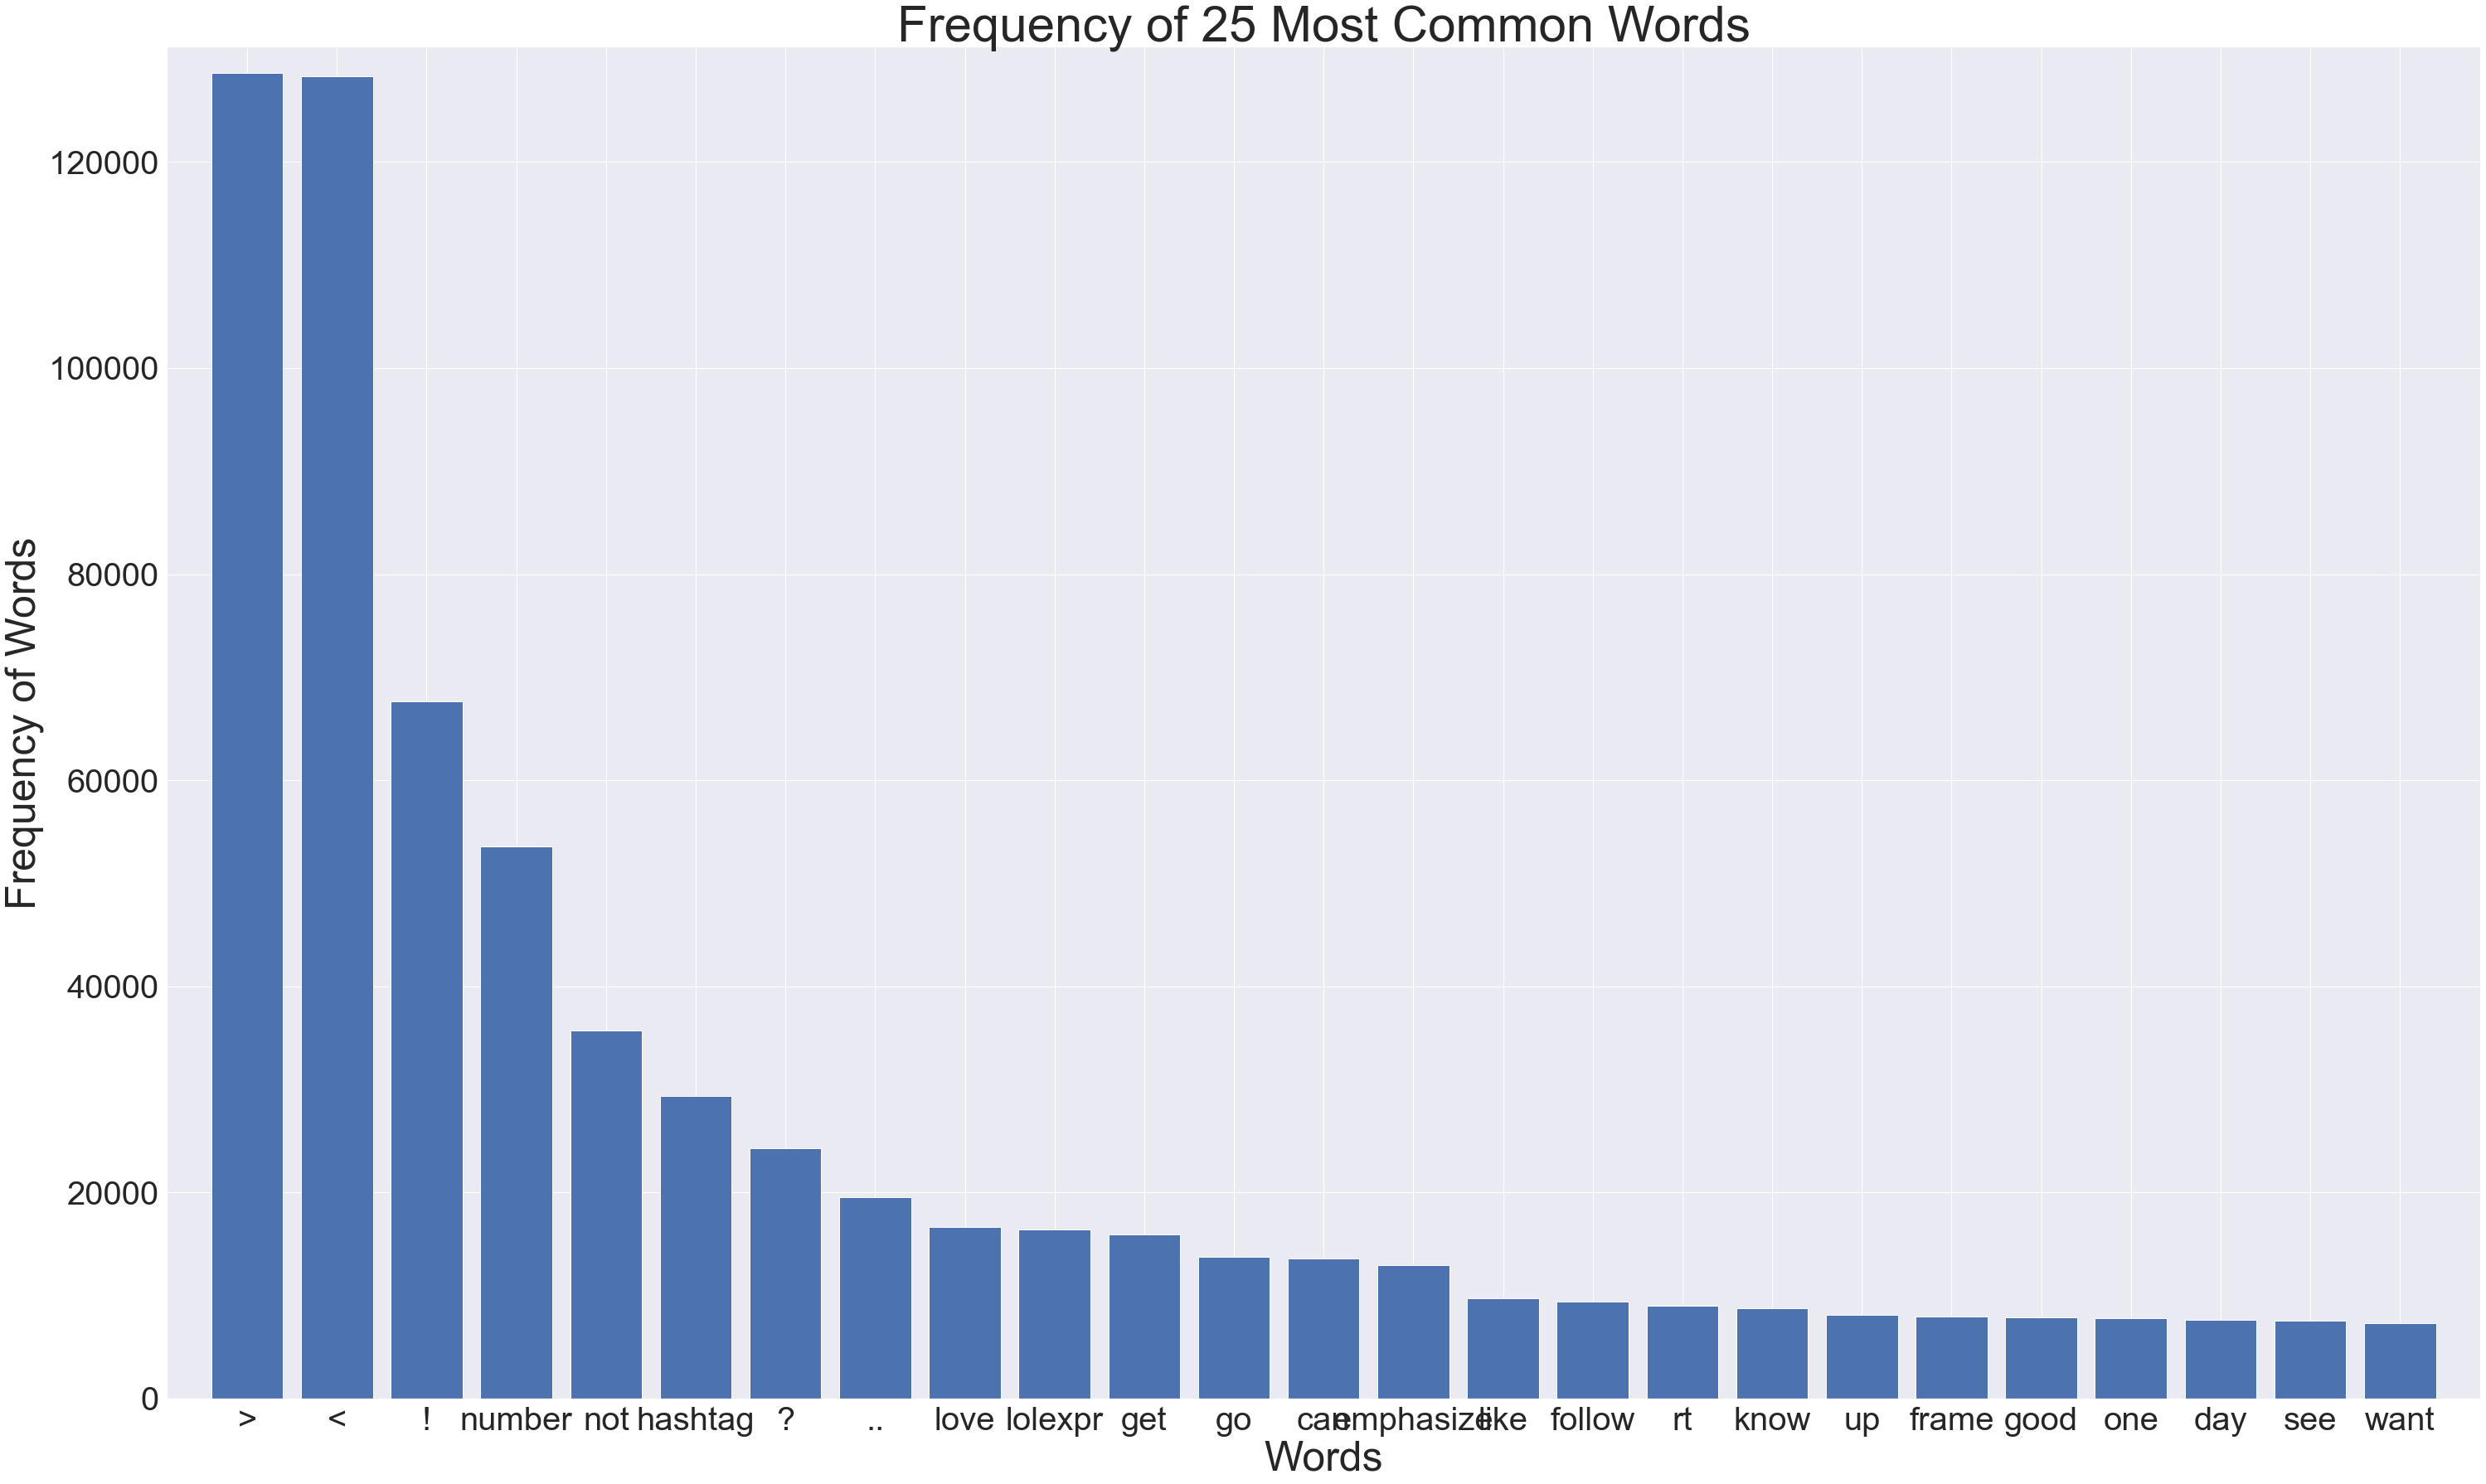

In [38]:
mostcommon_small2 = FreqDist(allwords2).most_common(25)
x, y = zip(*mostcommon_small2)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=360, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()